# Introduction

In this notebook we do a basic data exploratory analysis of the datasets we will be using to evaluate the RTABMAP and ORBSLAM2 SLAM algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
gt = pd.read_csv('../data/poses/param1_gt.txt', header=None, sep=" ").rename(columns={0:'timestamp', 
                   1:'x', 
                   2:'y', 
                   3:'z', 
                   4:'r_x', 
                   5:'r_y', 
                   6:'r_z',
                   7:'r_w'})
odom = pd.read_csv('../data/poses/param1_odom.txt', header=None, sep=" ").rename(columns={0:'timestamp', 
                   1:'x', 
                   2:'y', 
                   3:'z', 
                   4:'r_x', 
                   5:'r_y', 
                   6:'r_z',
                   7:'r_w'})
slam = pd.read_csv('../data/poses/param1_slam.txt', header=None, sep=" ").rename(columns={0:'timestamp', 
                   1:'x', 
                   2:'y', 
                   3:'z', 
                   4:'r_x', 
                   5:'r_y', 
                   6:'r_z',
                   7:'r_w'})

We get 3 different files from 3 different sensors. One file for the ground truth, one file for the SLAM trajectory estimation, one file for the odometry trajectory estimation. We use the ground truth to compare to rest of the files to calculate the Absolute Trajectory Error(using the SLAM trajectory) and Relative Pose Error (using the odometry trajectory).

Each dataset has 8 columns. The first column is the 'timestamp', the next three columns are transformation vectors that could be interpreted as the 'x', 'y', and 'z' positions of the robot. The last four columns are the rotational vectors that control how the car turns which can be interpreted as, roll(qx), pitch(qy), yaw(qz) and angle(qw).

### Ground Truth Data:

In [6]:
gt.head()

,timestamp,x,y,z,r_x,r_y,r_z,r_w
0,923.765,5.500790,-6.001145,0.099998,-0.000003,0.000004,0.705714,0.708496
1,940.265,5.504727,-5.268473,0.206342,0.194955,-0.196317,0.677121,0.681879
2,941.265,5.522249,-2.882402,0.100001,0.000001,-0.000001,0.704491,0.709713
3,942.315,5.539723,-0.470066,0.100001,-0.000000,0.000000,0.704610,0.709595
4,943.315,5.436194,-0.086068,0.100001,0.000003,0.000001,0.474605,0.880199


### Odometry Data:

In [7]:
odom.head()

,timestamp,x,y,z,r_x,r_y,r_z,r_w
0,923.765,5.500790,-6.001146,0.100000,0.000002,0.000001,0.705714,0.708496
1,940.265,5.504744,-5.266027,0.206238,0.194725,-0.196092,0.677186,0.681945
2,941.265,5.522266,-2.880105,0.100001,0.000001,0.000001,0.704491,0.709713
3,942.315,5.539739,-0.467770,0.099996,-0.000001,-0.000007,0.704610,0.709594
4,943.315,5.436188,-0.086096,0.100000,-0.000007,-0.000004,0.474418,0.880300


### SLAM Data:

In [8]:
slam.head()

,timestamp,x,y,z,r_x,r_y,r_z,r_w
0,923.765,5.797664,-5.713663,0.099832,-0.000036,-0.000062,0.726199,0.687485
1,940.265,5.758476,-4.979581,0.206093,0.200359,-0.190354,0.696915,0.661764
2,941.265,5.657774,-3.017038,0.099917,-0.000036,-0.000062,0.724988,0.688762
3,942.315,5.533881,-0.607824,0.099989,-0.000038,-0.000070,0.725104,0.688640
4,943.315,5.408146,-0.232873,0.099989,-0.000026,-0.000075,0.500014,0.866018


## Time Stamp Column:

Since all 3 datasets are collected at the same time, there is no variation between the 3 datasets.

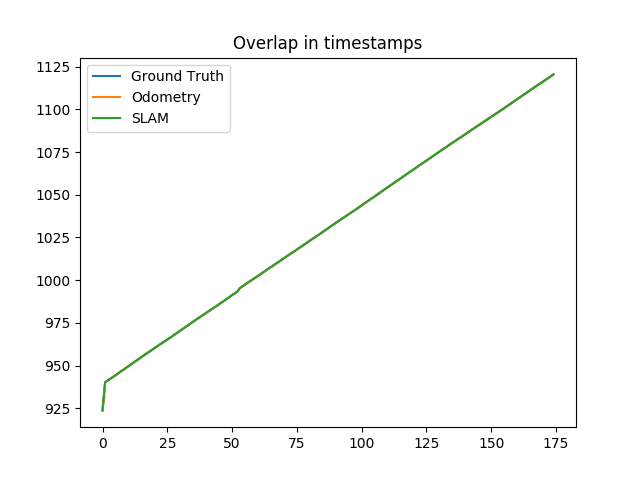

## X and Y Columns:

If we were to graph these two columns, we are able to see the trajectory of the car.

We can see that they all seem to plot the same path which is a good sign

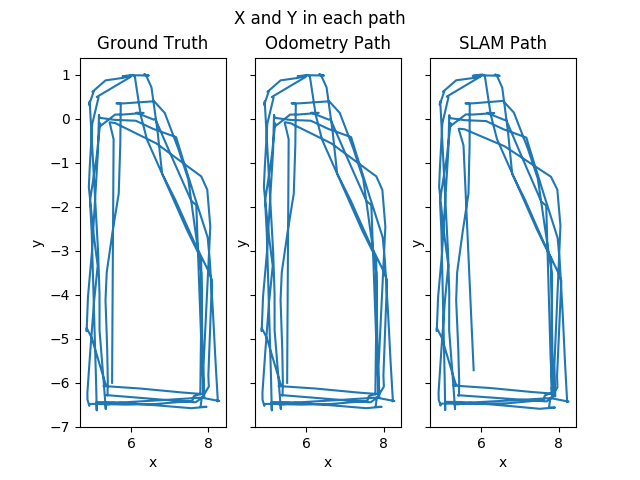

## Z Column:

Since there is no elevation change in the simulation, our 'z' values are similar

In [23]:
pd.read_csv('../results/z.csv', index_col=0)

,Average Value of Z
Ground Truth,0.103598
Odometry,0.103591
SLAM,0.103598


When we graph all 3 datasets' z values, we see that it overlaps with each other.

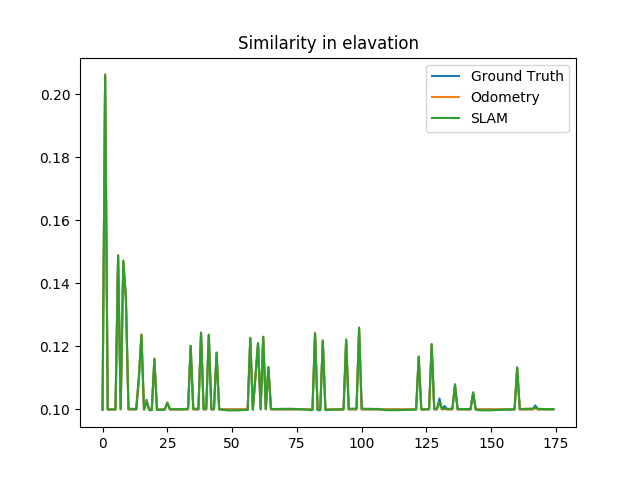

## Rotational Vectors:

### Vectors r_x, r_y:

The last four columns are the quarternions. We generally see the rotaional values change when the x and y values have a change in direction.

Since this is a car, there is no pitch and roll, the first two rotional vectors, they are relatively the same across all 3 datasets. 

In [22]:
pd.read_csv('../results/rx.csv', index_col=0)

,Average Value of Rotations X
Ground Truth,0.001990
Odometry,0.001993
SLAM,0.002026


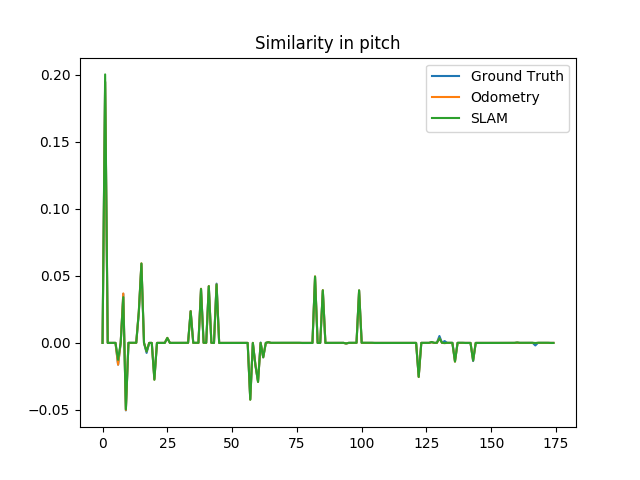

In [24]:
pd.read_csv('../results/ry.csv', index_col=0)

,Average Value of Rotations Y
Ground Truth,0.000905
Odometry,0.000904
SLAM,0.000894


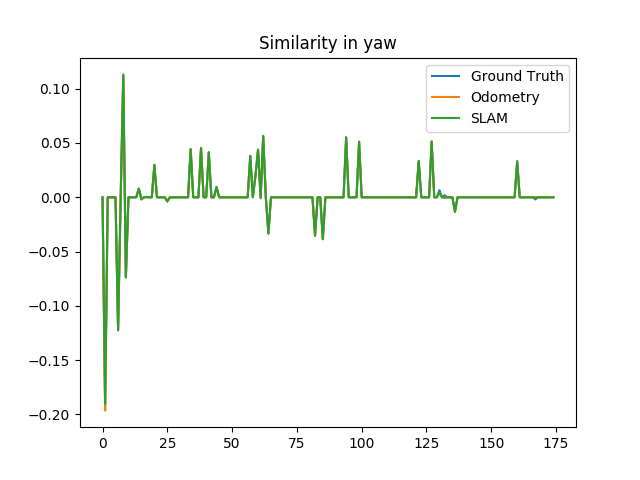

### Vectors r_w:

The column 'r_w' corresponds to the angle of the wheel. The angles of the wheels also stays relatively the same across all 3 datasets.

In [28]:
pd.read_csv('../results/rw.csv', index_col=0)

,Average Value of Rotations X
Ground Truth,0.629251
Odometry,0.629271
SLAM,0.628675


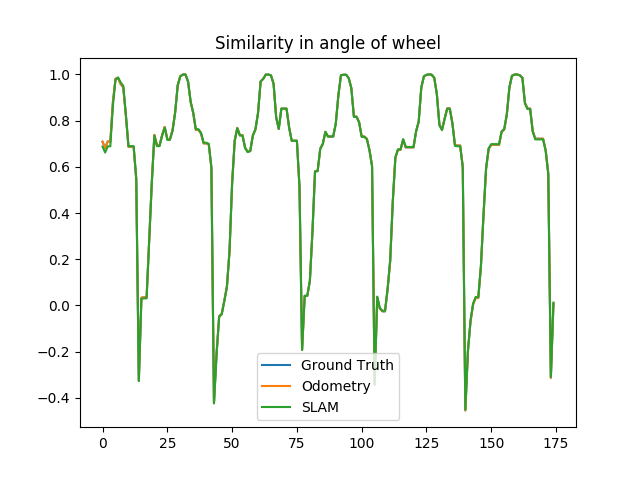

### Vectors r_z:

#### Ground Truth:

If we look at the graph, we see that the first turn occurs around the 6th row. It is also where there is a change in direction in the y column.

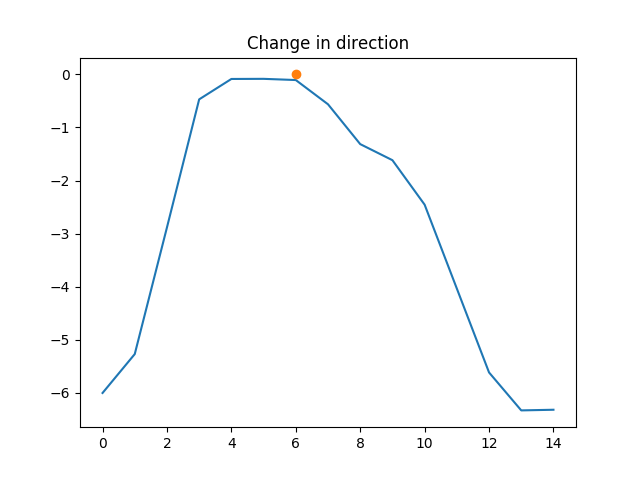

We see that the rotation values also shift at the 6th index when the y position changed.

This can be seen through the 3 datasets too

#### Odometry Data:

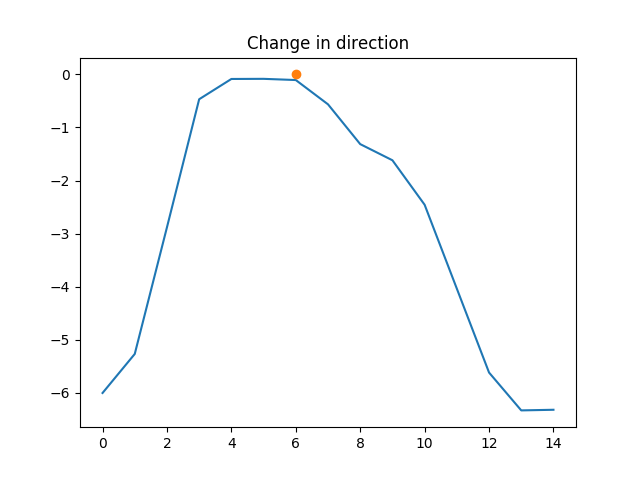

#### SLAM Data:

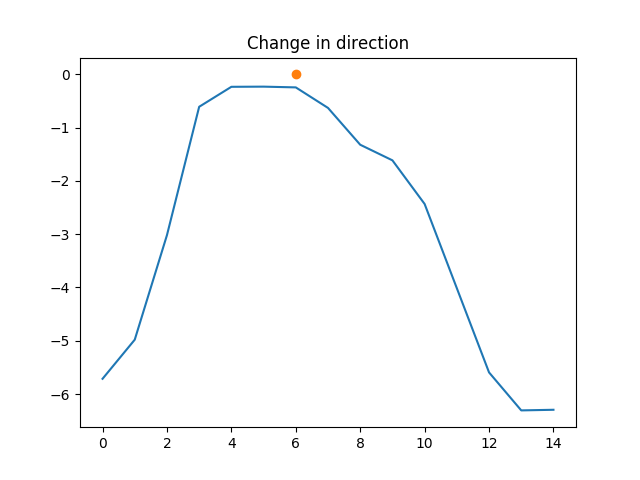